<a href="https://colab.research.google.com/github/febrinata23/training_ds/blob/main/Module_4_2_Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Arima

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import datetime
import urllib.request
from bs4 import BeautifulSoup
import warnings
import statsmodels.api as sm
from pandas.plotting import lag_plot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import math

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [14, 6]
plt.rc('font', size=8)

name = 'TLKM.JK'
ticker = yfinance.Ticker(name.upper())
today = datetime.datetime.now()
start_date = datetime.datetime.now() - datetime.timedelta(1800)
df = ticker.history(interval="1d",start=start_date,end=today)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-27 00:00:00+07:00,3110.363608,3168.269314,3102.091365,3159.997070,87146600,0.0,0.0
2019-05-28 00:00:00+07:00,3143.452691,3159.997179,3052.458008,3052.458008,322246900,0.0,0.0
2019-05-29 00:00:00+07:00,3102.090987,3168.268928,3085.546502,3126.907715,122534500,0.0,0.0
2019-05-30 00:00:00+07:00,3126.907715,3126.907715,3126.907715,3126.907715,0,0.0,0.0
2019-05-31 00:00:00+07:00,3126.907888,3250.991534,3126.907888,3226.174805,194331700,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-23 00:00:00+07:00,3180.000000,3190.000000,3080.000000,3100.000000,312052300,0.0,0.0
2024-04-24 00:00:00+07:00,3100.000000,3110.000000,3040.000000,3040.000000,327330800,0.0,0.0
2024-04-25 00:00:00+07:00,3010.000000,3060.000000,2990.000000,3040.000000,369525200,0.0,0.0


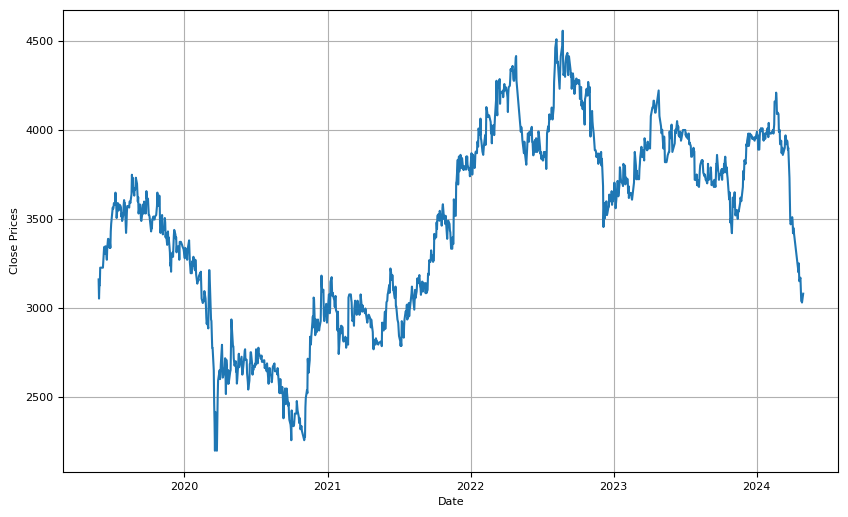

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.show()

In [ ]:
#ekstrak price jadi close price & date
df_close = df[['Close']]
df_close

,Close
Date,
2019-05-27 00:00:00+07:00,3159.997070
2019-05-28 00:00:00+07:00,3052.458008
2019-05-29 00:00:00+07:00,3126.907715
2019-05-30 00:00:00+07:00,3126.907715
2019-05-31 00:00:00+07:00,3226.174805
...,...
2024-04-23 00:00:00+07:00,3100.000000
2024-04-24 00:00:00+07:00,3040.000000
2024-04-25 00:00:00+07:00,3040.000000


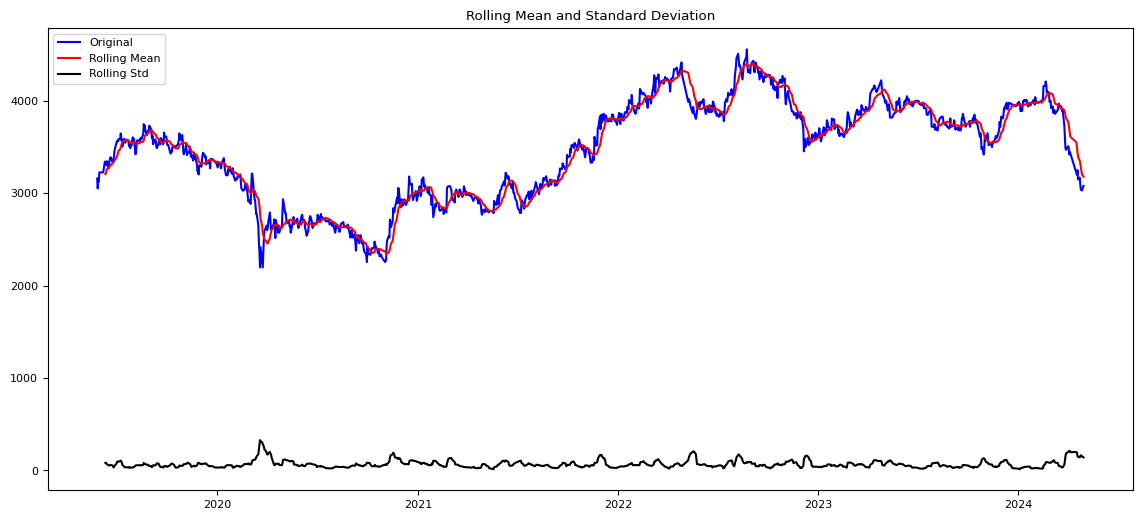

Results of dickey fuller test
Test Statistics                  -1.670144
p-value                           0.446557
No. of lags used                  3.000000
Number of observations used    1196.000000
critical value (1%)              -3.435829
critical value (5%)              -2.863960
critical value (10%)             -2.568058
dtype: float64


In [ ]:
#Test for stationarity - test untuk mengetahu apakah ada seasonal atau trend naik atau turun seiiring perjalanan waktu
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # Moving Average
    rolstd = timeseries.rolling(12).std() # Moving std
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #running Stationary checking
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df_close)

Since Test Statistics (-1.650187) > Critical Value (1%),Critical Value (5%),Critical Value (10%) then it's safely say that the data is not stationary.

Since the p-value (0.456943) is greater than all the significance levels (1%, 5%, and 10%), we fail to reject the null hypothesis. This means we cannot statistically conclude that the time series is stationary based on the DF test.

<Figure size 1400x600 with 0 Axes>

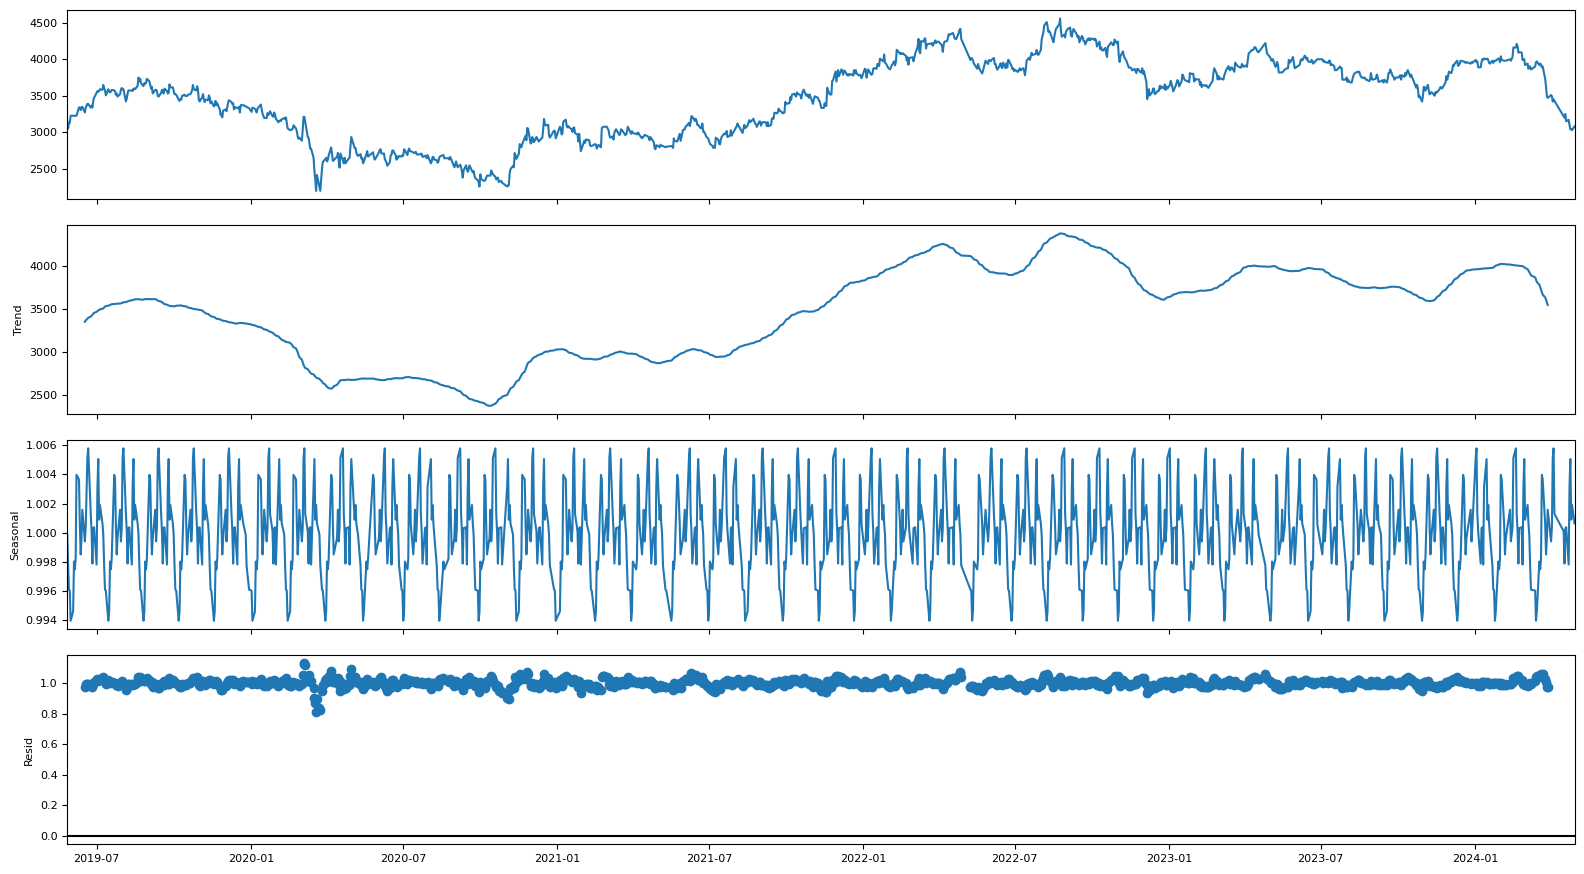

In [ ]:
#removing trend and seasonal from the data
#Additive Model: In this model, the seasonal component is added to the trend at each time point. The filtering process aims to remove the seasonal component to reveal the underlying trend.
#Multiplicative Model: Here, the seasonal component multiplies the trend at each time point. The filtering process isolates the seasonal component by dividing the original series by a smoothed version of itself (representing the trend).
result = seasonal_decompose(df_close, model='multiplicative',period =30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

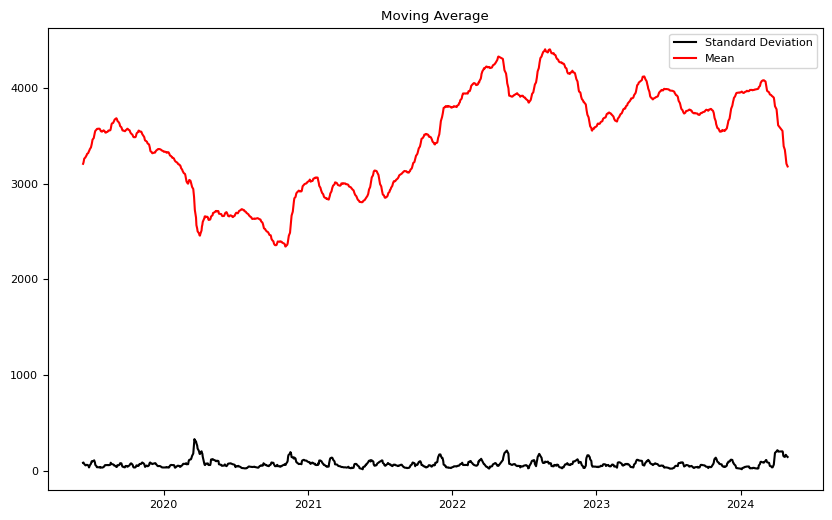

In [ ]:
#mendapatkan rolling average dari series yang sudah di dihilangkan seasonalitynya
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
# df_log = np.log(df_close)
df_log = df_close
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

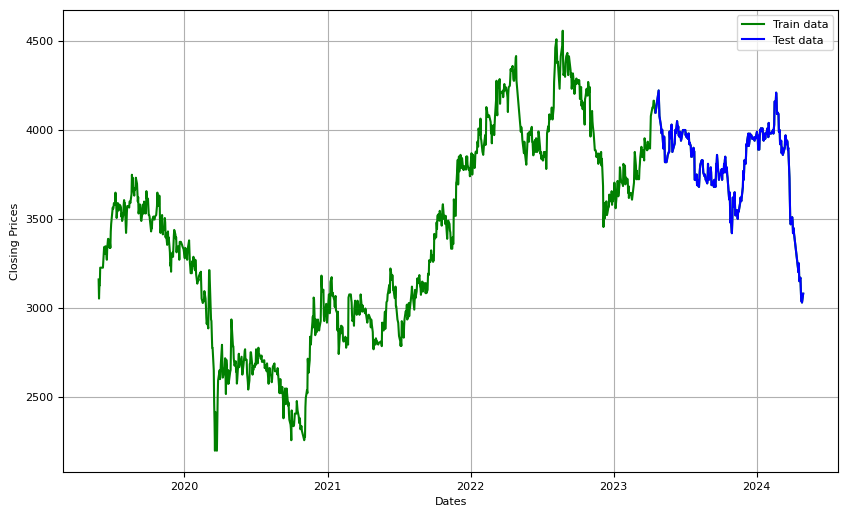

In [ ]:
# trainning data
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10575.989, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10573.262, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10571.487, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10574.254, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10566.163, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10555.846, Time=0.62 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10555.341, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10555.845, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10557.782, Time=0.87 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=10553.743, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10571.564, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=10554.216, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10554.227, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10564.590, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0

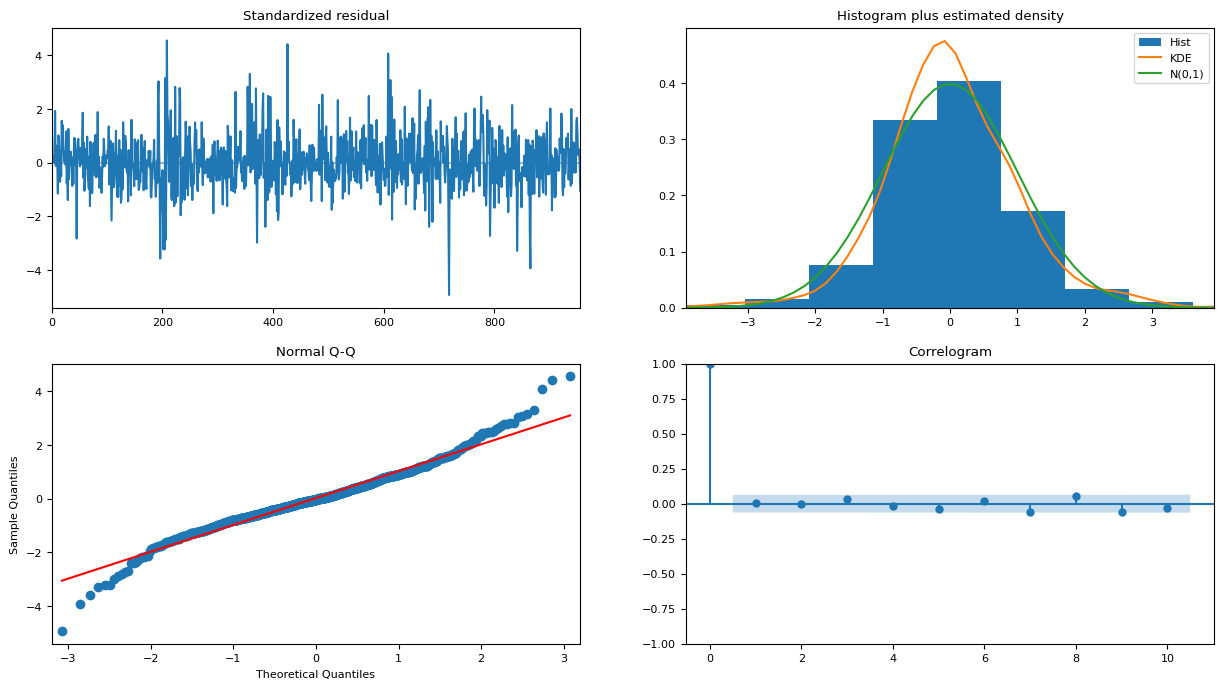

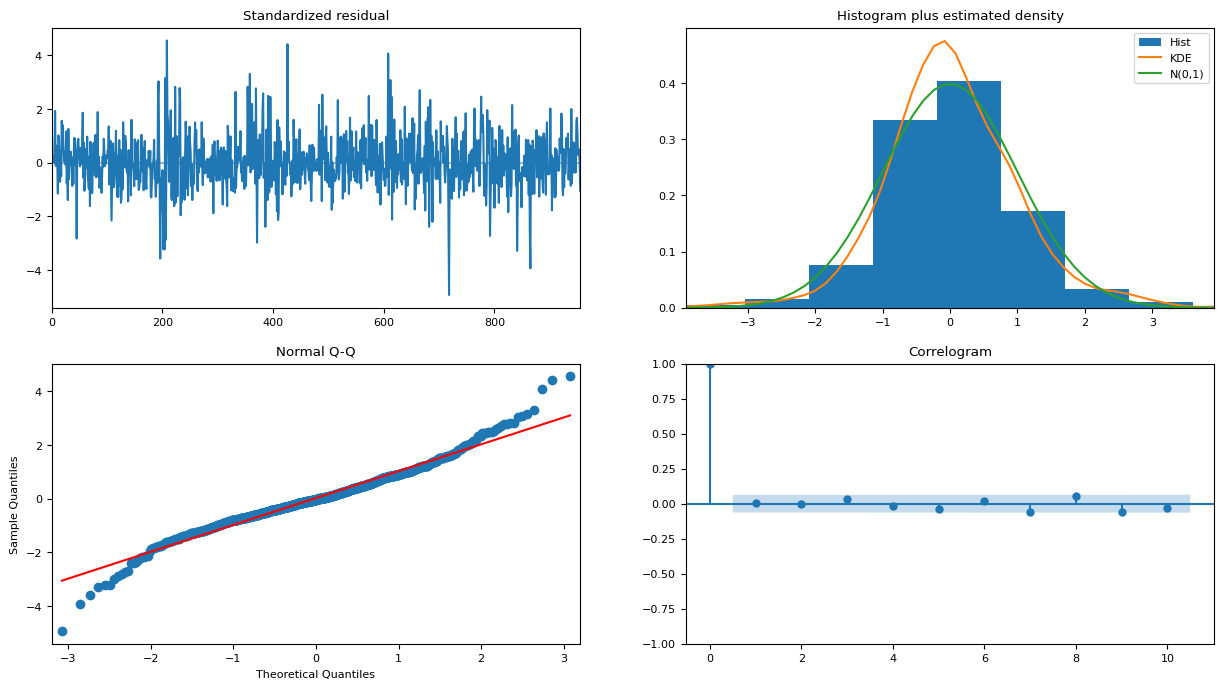

In [ ]:
#check best model untuk dipakai di modeling ARIMA
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))

In [ ]:
training_data = train_data['Close'].values
testing_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(testing_data)

for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(2,1,0)) #order=(order_of_the_autoregressive_model, degree_of_differencing,order_of_the_moving-average_model)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = testing_data[time_point]
    history.append(true_test_value)

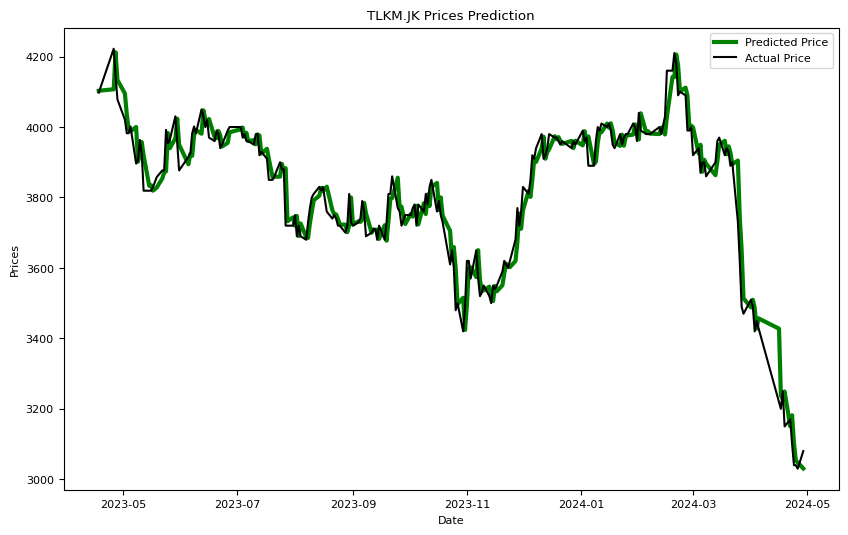

In [ ]:
test_set_range = test_data.index
train_set_range = train_data.index
plt.plot(test_set_range, model_predictions, color='green',label='Predicted Price',linewidth=3)
plt.plot(test_set_range, testing_data, color='black', label='Actual Price')
plt.title('{} Prices Prediction'.format(name))
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(testing_data, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(testing_data, model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(testing_data, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - testing_data)/np.abs(testing_data))
print('MAPE: '+str(mape))

MSE: 2509.150166866266
MAE: 36.722386383634195
RMSE: 50.09141809597993
MAPE: 0.009765012788684477


In [ ]:
full_history = [x for x in np.concatenate((training_data, testing_data))]

# create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
  value = dataset[i] - dataset[i - interval]
  diff.append(value)
 return np.array(diff)

# invert differenced value
def inverse_difference(h, yhat, interval=1):
 return yhat + h[-interval]


# seasonal difference
days_in_year = 365
differenced = difference(full_history, days_in_year)
# fit model
model = sm.tsa.arima.ARIMA(differenced, order=(2,1,0))
model_fit = model.fit()
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=30)
# invert the differenced forecast to something usable
pred_history = [x for x in full_history]
day = 1
for yhat in forecast:
 inverted = inverse_difference(history, yhat, 365)
 print('Day %d: %f' % (day, inverted))
 pred_history.append(inverted)
 day += 1

Day 1: 3027.313597
Day 2: 3011.522589
Day 3: 3013.479896
Day 4: 3015.329151
Day 5: 3014.920284
Day 6: 3014.719150
Day 7: 3014.788657
Day 8: 3014.808384
Day 9: 3014.797810
Day 10: 3014.796198
Day 11: 3014.797687
Day 12: 3014.797765
Day 13: 3014.797568
Day 14: 3014.797575
Day 15: 3014.797600
Day 16: 3014.797597
Day 17: 3014.797594
Day 18: 3014.797594
Day 19: 3014.797595
Day 20: 3014.797595
Day 21: 3014.797595
Day 22: 3014.797595
Day 23: 3014.797595
Day 24: 3014.797595
Day 25: 3014.797595
Day 26: 3014.797595
Day 27: 3014.797595
Day 28: 3014.797595
Day 29: 3014.797595
Day 30: 3014.797595


In [ ]:
#Extend date to predict the next 30 days
future_dates = pd.date_range(start=df_log.index[-1], periods=30, freq='D')

# Extend the DataFrame with new dates
df_log = df_log.reindex(future_dates, fill_value=np.nan)  # Fill with NaN for 'close' and 'prediction' (if present)

In [ ]:
# Truncate if predictions are longer
predictions = pred_history[:len(df_log)]

# Create a new column 'prediction' with the predictions
df_log['prediction'] = predictions

In [ ]:
df_log

,Close,prediction
2024-04-29 00:00:00+07:00,3080.0,3126.907715
2024-04-30 00:00:00+07:00,NaN,3226.174805
2024-05-01 00:00:00+07:00,NaN,3226.174805
2024-05-02 00:00:00+07:00,NaN,3226.174805
2024-05-03 00:00:00+07:00,NaN,3226.174805
2024-05-04 00:00:00+07:00,NaN,3226.174805
2024-05-05 00:00:00+07:00,NaN,3226.174805
2024-05-06 00:00:00+07:00,NaN,3341.986084
2024-05-07 00:00:00+07:00,NaN,3325.441650
2024-05-08 00:00:00+07:00,NaN,3304.147217


In [ ]:
close_prices = df_log['close_price']
prediction_prices = df_log['prediction_price'].fillna(method='ffill')  # Forward fill for prediction (optional)

plt.plot(df_range, close_prices, color='black', label='Actual Price')
plt.plot(df_range, prediction_prices, label='Predicted Price', color='green',label='Predicted Price',linewidth=3,ls="--")
plt.title('{} Prices Prediction'.format(name))
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

KeyError: 'date'

#Prophet

In [ ]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [14, 6]
plt.rc('font', size=8)

name = 'TLKM.JK'
ticker = yfinance.Ticker(name.upper())
today = pd.Timestamp.now()
start_date = today - pd.Timedelta(days=7200)
df = ticker.history(interval="1d", start=start_date, end=today)

df.reset_index(inplace=True)
df = df[["Date", "Close"]]
df = df.rename(columns={"Date": "ds", "Close": "y"})

# Remove timezone information from the "ds" column
df['ds'] = df['ds'].dt.tz_localize(None)

# Create and fit the Prophet model
fbp = Prophet(daily_seasonality=True, yearly_seasonality=True, interval_width=0.8)
fbp.fit(df)

# Specify the number of days in the future
fut = fbp.make_future_dataframe(periods=365)

# Make predictions
forecast = fbp.predict(fut)

# Plot the forecast using Plotly
fig = plot_plotly(fbp, forecast)
fig.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpn3fzlmz7/lqtkhw6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn3fzlmz7/kln_ycw9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42032', 'data', 'file=/tmp/tmpn3fzlmz7/lqtkhw6c.json', 'init=/tmp/tmpn3fzlmz7/kln_ycw9.json', 'output', 'file=/tmp/tmpn3fzlmz7/prophet_modelkmfvs_lb/prophet_model-20240429025142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:51:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:51:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
finals = forecast[['ds', 'yhat']].join(df, how= 'left', lsuffix='ds', rsuffix='Date')
finals.dropna(subset=['y'],inplace = True)
finals

,dsds,yhat,dsDate,y
0,2004-09-28,460.195221,2004-09-28,470.234894
1,2004-09-29,465.203127,2004-09-29,470.234894
2,2004-09-30,467.628592,2004-09-30,473.084839
3,2004-10-01,469.649114,2004-10-01,478.784790
4,2004-10-04,471.283157,2004-10-04,495.884186
...,...,...,...,...
4832,2024-04-17,4190.515804,2024-04-17,3200.000000
4833,2024-04-18,4193.587695,2024-04-18,3250.000000
4834,2024-04-19,4196.341744,2024-04-19,3150.000000
4835,2024-04-22,4200.758241,2024-04-22,3170.000000


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-09-28,456.728626,197.169714,726.826488,456.728626,456.728626,0.360828,0.360828,0.360828,-31.867442,...,-3.780847,-3.780847,-3.780847,36.009118,36.009118,36.009118,0.0,0.0,0.0,457.089454
1,2004-09-29,457.416196,200.245521,739.671658,457.416196,457.416196,3.629516,3.629516,3.629516,-31.867442,...,-1.823040,-1.823040,-1.823040,37.319998,37.319998,37.319998,0.0,0.0,0.0,461.045712
2,2004-09-30,458.103765,200.308307,733.492100,458.103765,458.103765,5.459587,5.459587,5.459587,-31.867442,...,-1.121449,-1.121449,-1.121449,38.448478,38.448478,38.448478,0.0,0.0,0.0,463.563352
3,2004-10-01,458.791335,186.574869,735.076393,458.791335,458.791335,6.875507,6.875507,6.875507,-31.867442,...,-0.624063,-0.624063,-0.624063,39.367013,39.367013,39.367013,0.0,0.0,0.0,465.666843
4,2004-10-04,460.854044,211.738350,741.819477,460.854044,460.854044,8.164151,8.164151,8.164151,-31.867442,...,-0.617470,-0.617470,-0.617470,40.649063,40.649063,40.649063,0.0,0.0,0.0,469.018195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,2025-04-22,4581.705636,4187.075567,4894.457918,4402.512568,4818.603965,-66.769956,-66.769956,-66.769956,-31.867442,...,-3.780847,-3.780847,-3.780847,-31.121667,-31.121667,-31.121667,0.0,0.0,0.0,4514.935680
5201,2025-04-23,4582.640489,4165.209074,4886.888980,4402.297352,4820.939980,-64.598628,-64.598628,-64.598628,-31.867442,...,-1.823040,-1.823040,-1.823040,-30.908146,-30.908146,-30.908146,0.0,0.0,0.0,4518.041861
5202,2025-04-24,4583.575342,4187.171095,4875.829672,4401.489750,4823.279281,-63.685901,-63.685901,-63.685901,-31.867442,...,-1.121449,-1.121449,-1.121449,-30.697010,-30.697010,-30.697010,0.0,0.0,0.0,4519.889441
5203,2025-04-25,4584.510195,4175.298575,4884.231628,4401.486596,4825.618582,-62.977639,-62.977639,-62.977639,-31.867442,...,-0.624063,-0.624063,-0.624063,-30.486134,-30.486134,-30.486134,0.0,0.0,0.0,4521.532555


# LSTM (long short term memory)

In [ ]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import datetime
import urllib.request
from bs4 import BeautifulSoup
import warnings
import statsmodels.api as sm
from pandas.plotting import lag_plot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import math

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [14, 6]
plt.rc('font', size=8)

name = 'TLKM.JK'
ticker = yfinance.Ticker(name.upper())
today = datetime.datetime.now()
start_date = datetime.datetime.now() - datetime.timedelta(1800)
df = ticker.history(interval="1d",start=start_date,end=today)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-27 00:00:00+07:00,3110.363368,3168.269069,3102.091125,3159.996826,87146600,0.0,0.0
2019-05-28 00:00:00+07:00,3143.452440,3159.996926,3052.457764,3052.457764,322246900,0.0,0.0
2019-05-29 00:00:00+07:00,3102.091229,3168.269175,3085.546743,3126.907959,122534500,0.0,0.0
2019-05-30 00:00:00+07:00,3126.907959,3126.907959,3126.907959,3126.907959,0,0.0,0.0
2019-05-31 00:00:00+07:00,3126.907888,3250.991534,3126.907888,3226.174805,194331700,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-22 00:00:00+07:00,3150.000000,3200.000000,3130.000000,3170.000000,140971800,0.0,0.0
2024-04-23 00:00:00+07:00,3180.000000,3190.000000,3080.000000,3100.000000,312052300,0.0,0.0
2024-04-24 00:00:00+07:00,3100.000000,3110.000000,3040.000000,3040.000000,327330800,0.0,0.0


In [ ]:
df_close = df['Close']
df_close

Date
2019-05-27 00:00:00+07:00    3159.996826
2019-05-28 00:00:00+07:00    3052.457764
2019-05-29 00:00:00+07:00    3126.907959
2019-05-30 00:00:00+07:00    3126.907959
2019-05-31 00:00:00+07:00    3226.174805
                                ...     
2024-04-22 00:00:00+07:00    3170.000000
2024-04-23 00:00:00+07:00    3100.000000
2024-04-24 00:00:00+07:00    3040.000000
2024-04-25 00:00:00+07:00    3040.000000
2024-04-26 00:00:00+07:00    3030.000000
Name: Close, Length: 1199, dtype: float64

In [ ]:
# Convert the dataframe to a numpy array
dataset = df_close.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

960

In [ ]:
dataset

array([3159.99682617, 3052.45776367, 3126.90795898, ..., 3040.        ,
       3040.        , 3030.        ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset = dataset.reshape(-1, 1)
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[-0.57698692],
       [-0.77905188],
       [-0.63916062],
       ...,
       [-0.80245991],
       [-0.80245991],
       [-0.82124982]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([-0.57698692, -0.77905188, -0.63916062, -0.63916062, -0.45263908,
       -0.45263908, -0.45263908, -0.45263908, -0.45263908, -0.45263908,
       -0.23503024, -0.26611709, -0.3061296 , -0.22734179, -0.22734179,
       -0.36915976, -0.24309898, -0.14855444, -0.14855444, -0.24309898,
       -0.19582694, -0.24309898, -0.06976709,  0.00902072,  0.13508104,
        0.182354  ,  0.16659634,  0.182354  ,  0.2296265 ,  0.21386839,
        0.3399287 ,  0.24538369,  0.21386839,  0.07205088,  0.2296265 ,
        0.16659634,  0.15083869,  0.16659634,  0.21386839,  0.19811119,
        0.182354  ,  0.08780853,  0.11932338,  0.04053603,  0.10356619,
        0.21386839,  0.26114135,  0.2296265 ,  0.2296265 , -0.08552428,
       -0.00673647,  0.11932338,  0.19811119,  0.19811119,  0.19811119,
        0.182354  ,  0.24538369,  0.24538369,  0.2296265 ,  0.32417105])]
[0.5290191687141873]

[array([-0.57698692, -0.77905188, -0.63916062, -0.63916062, -0.45263908,
       -0.45263908, -0.45263908, -0.45

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

900/900 [==============================] - 55s 56ms/step - loss: 0.0514


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 1s 32ms/step


69.94648878342423

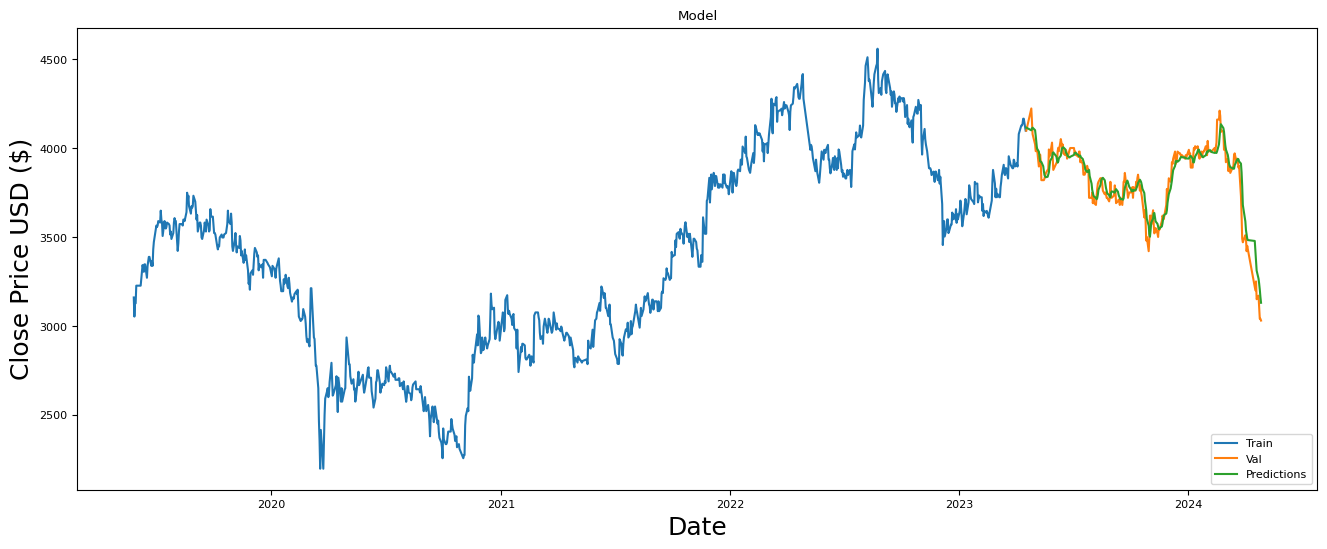

In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()